In [3]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('preprocessed.csv')
df.head()

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,recur task dai need todolist remind buzz time ...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,instead shop download anydo wide set dai sched...,8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,blue app ask updat acct email task list lost t...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terribl updat app perfect plan certain task co...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,app deceivingli terribl nice design featur lik...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo


In [5]:
df = df.dropna(subset=['content'])  # removing the rows which has null values in content column

# wordcloud

**A word cloud is a visual representation of text data, where words are displayed in varying sizes based on
their frequency or importance in the text. It's a way to summarize and visualize textual information,
making it easier to identify key themes and insights at a glance. Word clouds are commonly used in text
analysis to explore patterns, sentiment, and topics within large bodies of text.

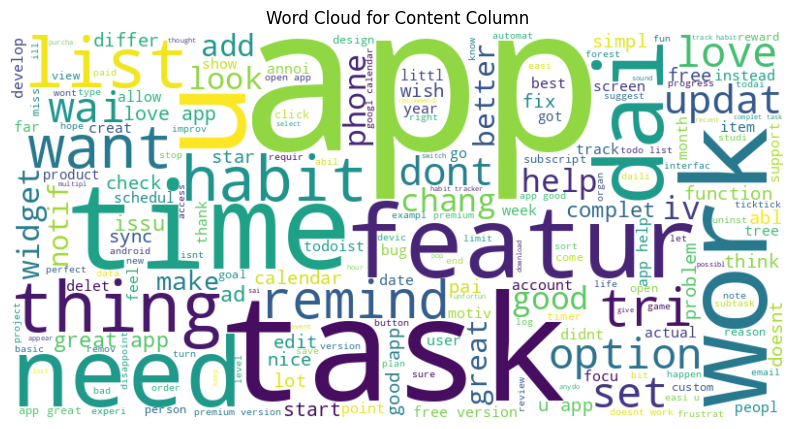

In [6]:

# Handle NaN values by replacing them with an empty string
df['content'].fillna('', inplace=True)

# Combine all text data into one string
text = " ".join(df['content'])

# Generate the word cloud using a TrueType font
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Content Column')
plt.axis('off')
plt.show()


# lexicon approach for the sentiemental analysis


**The lexicon approach for sentiment analysis involves using predefined dictionaries or lexicons that contain words or phrases annotated with sentiment scores (e.g., positive, negative, neutral). These scores indicate the sentiment polarity associated with each word or phrase. During analysis, the text is tokenized into words, and each word is matched against the entries in the lexicon to determine its sentiment polarity. The sentiment scores of individual words are then aggregated to derive the overall sentiment of the text. This approach is effective for its simplicity and transparency but may struggle with context-dependent sentiment and nuanced language expressions. Popular lexicons include VADER, AFINN, and SentiWordNet.

**The AFINN lexicon is a list of English words rated for valence with an integer between negative and positive

In [ ]:

# Make sure to replace 'content' with the actual name of your column
text_series = df['content']

# Download Vader lexicon if not already downloaded
nltk.download('vader_lexicon')

# Instantiate Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each text in the Series
sentiment_scores = []

for text in text_series:
    scores = sid.polarity_scores(text)
    sentiment_scores.append(scores)

# Convert the sentiment scores into a DataFrame
sentiment_df = pd.DataFrame(sentiment_scores, index=text_series.index)

# Concatenate the original DataFrame with the sentiment scores DataFrame
df_with_sentiment = pd.concat([df, sentiment_df], axis=1)

df_with_sentiment.head(5)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yashas.m/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,neg,neu,pos,compound
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,recur task dai need todolist remind buzz time ...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo,0.240,0.693,0.067,-0.7579
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,instead shop download anydo wide set dai sched...,8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo,0.064,0.862,0.074,0.1027
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,blue app ask updat acct email task list lost t...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo,0.213,0.787,0.000,-0.7430
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terribl updat app perfect plan certain task co...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo,0.083,0.726,0.191,0.4588
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,app deceivingli terribl nice design featur lik...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo,0.138,0.666,0.196,0.4650


In [ ]:
#this code represent the counting of the neutral, positive and negative sentiments which is determined based the scores
#finally the negative,positive and neutral is printed inside the function count_nps where compund and content parameters are passed
def count_nps(compound, content):
    pos_count = 0
    pos_statements = []
    neu_count = 0
    neu_statements = []
    neg_count = 0
    neg_statements = []
    for i in range(len(compound)):  # Use len(compound_score) to get the length of the array
        if compound[i] > 0:
            pos_count += 1
            pos_statements.append(content[i])
        elif compound[i] < 0:
            neg_count += 1
            neg_statements.append(content[i])
        else:
            neu_count += 1
            neu_statements.append(content[i])

    print("Neutral count:", neu_count)
    print("Negative count:", neg_count)
    print("Positive count:", pos_count)


In [ ]:
# Reset index to ensure continuous integer indices
df_with_sentiment.reset_index(drop=True, inplace=True)

# Call count_nps function with the compound_score and content columns
count_nps(df_with_sentiment['compound'], df_with_sentiment['content'])


Neutral count: 2694
Negative count: 2911
Positive count: 11117


In [ ]:
#percentage of the each and every type of the statements are diaplayed
def percentage():
    neu_percent = (neu_count / 16722) * 100
    pos_percent = (pos_count / 16722) * 100
    neg_percent=(neg_count/16722) *100
    print(f"neutral percentage is:{neu_percent}")
    print(f"positive percentage is:{pos_percent}")
    print(f"neutral percentage is :{neg_percent}")


In [ ]:
# call the function inorder to display
percentage()

neutral percentage is:16.499222581030978
positive percentage is:66.48128214328429
neutral percentage is :17.40820476019615


# bar graph to compare between neutral,negtive and positive statements

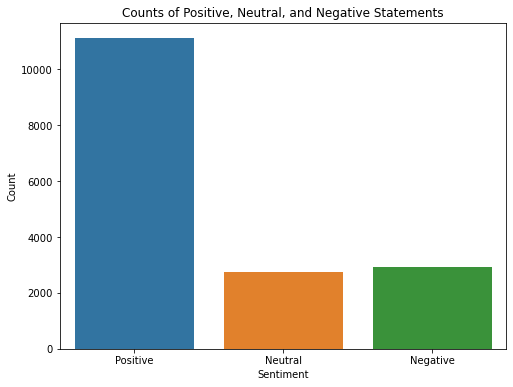

In [ ]:

labels = ['Positive', 'Neutral', 'Negative']
counts = [pos_count, neu_count, neg_count]

# Bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=counts)
plt.title('Counts of Positive, Neutral, and Negative Statements')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# pie chart

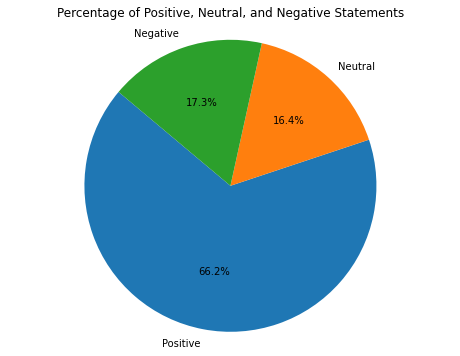

In [ ]:
# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Positive, Neutral, and Negative Statements')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Histogram

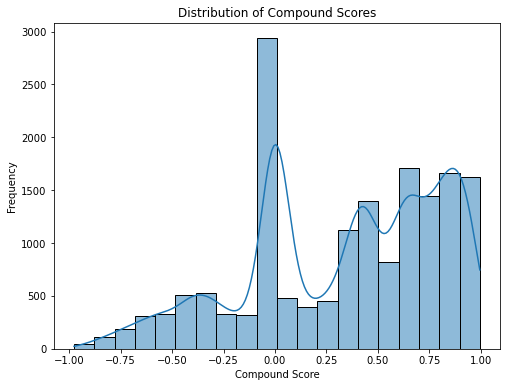

In [ ]:

compound = df_with_sentiment['compound']

# Plotting the histogram
plt.figure(figsize=(8, 6))
sns.histplot(compound, bins=20, kde=True)
plt.title('Distribution of Compound Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()

**this display the status of the statments through user defines row of the certain column

In [ ]:
i=int(input("enter the row that you need to check the status of the content data"))

h=df_with_sentiment.compound[i]

if(h>0):
    print("positive statement")
elif(h<0):
    print("negative statement")
else:
    print("neutral statement")


enter the row that you need to check the status of the content data16720
neutral statement


# applying the machine learning algorithm K-Means clustering algorithm

**K-means clustering is an unsupervised machine learning algorithm that partitions a dataset into K distinct clusters. It starts by randomly initializing cluster centroids, then iteratively assigns data points to the nearest centroid and updates the centroids based on the mean of the assigned points or based on the distance formula. This process repeats until convergence. K-means is commonly used for tasks like customer segmentation and image compression.

max_features=1000: This parameter specifies the maximum number of features (unique words or terms) that will be considered by the vectorizer. In this case, it limits the vocabulary size to 1000 most frequent terms. If there are more than 1000 unique terms in the corpus, only the top 1000 terms (based on their frequency) will be considered for vectorization. This can help reduce the dimensionality of the feature space, which can be beneficial for computational efficiency and model performance, especially when dealing with large text corpora.

                                                 content  cluster
0      recur task dai need todolist remind buzz time ...        2
1      instead shop download anydo wide set dai sched...        0
2      blue app ask updat acct email task list lost t...        2
3      terribl updat app perfect plan certain task co...        2
4      app deceivingli terribl nice design featur lik...        0
...                                                  ...      ...
16782                                          excel app        0
16783  love easi u life organ love wai photo locat de...        2
16784                  love plan check app everydai love        0
16785                                       exactli need        0
16786                                               good        1

[16722 rows x 2 columns]


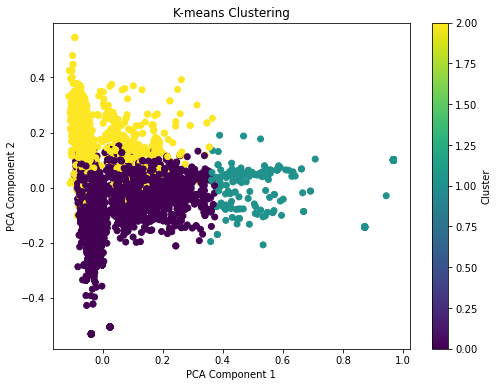

In [ ]:

# Handle NaN values by replacing them with an empty string
df['content'].fillna('', inplace=True)

# Vectorize the text data using TF-IDF representation
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['content'])

# Apply PCA to reduce dimensionality to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Apply K-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the DataFrame
df['cluster'] = clusters

# Display the DataFrame with cluster labels
print(df[['content', 'cluster']])

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()


yellow color plots are considered as C1 
purple color plots are considered as C2
green color plots are considered as C4

**since we have defined the k=3 it forms the three different clusters[C1,C2,C3] which is considered by applying the distance formula.
Initially  vectorized  data which is formed in [x,y]form is used to  determine the ditance between this points and  with each centroid points of C1,C2,C3 and the minimun distance is considered and that point will be allocated in that cluster .


In the above
->C1 exhibits a spread that falls between the blue and green clusters in terms of variability.
->C3 cluster seems to be the most compact with the data points concentrated in a smaller area, suggesting a higher degree of similarity among the points within this cluster.
->The C2 appears to have more data points and is more dispersed compared to the green cluster. This indicates a higher variability in the data points within Cluster.
*Higher variability in the data points typically means that the data points are spread out over a wider range or have larger differences from each other
